<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/Leak_fasefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Getting the Iris dataset and preparing the variables and target
#data = '/content/drive/MyDrive/Train dataset/train.csv'
data ="/content/drive/MyDrive/leak_Big_data.csv"
df = pd.read_csv(data)
df = df[(df["Condition"] == 0)|(df["Condition"] == 1)]
y = df["Condition"]
X = df.loc[:, ["Junc 11", "Junc 4", "Junc 1", "Junc 131", "Junc 150", "Junc 81", "Junc 137", "Junc 27", "Junc 30", "Junc 15", "Junc 45", "Junc 60", "Junc 25",]]
y = np.array(y)
X = np.array(X)


y = y.astype(np.int)[:, np.newaxis]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
import numpy as np
import pandas as pd

In [ ]:
!pip install --upgrade pandas

In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

In [ ]:
X_train

array([[123.8 , 115.01, 114.84, ..., 113.58, 109.52, 114.84],
       [126.21, 117.74, 117.06, ..., 116.85, 114.2 , 117.06],
       [130.28, 122.37, 121.4 , ..., 122.23, 121.88, 121.4 ],
       ...,
       [ 68.44,  52.29,  45.32, ...,  40.9 ,  39.17,  45.32],
       [130.28, 122.37, 121.4 , ..., 122.23, 121.88, 121.4 ],
       [127.54, 119.26, 117.02, ..., 118.67, 118.76, 117.02]])

In [ ]:
y_train

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
X_test

array([[129.96, 122.01, 120.53, ..., 121.8 , 121.71, 120.53],
       [122.18, 113.16, 111.19, ..., 112.08, 111.83, 111.19],
       [128.59, 120.45, 118.35, ..., 119.99, 120.07, 118.35],
       ...,
       [127.54, 119.26, 117.02, ..., 118.67, 118.76, 117.02],
       [123.8 , 115.01, 114.84, ..., 113.58, 109.52, 114.84],
       [123.8 , 115.01, 114.84, ..., 113.58, 109.52, 114.84]])

In [ ]:
y_test

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(13,)))

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(256, activation='relu'))

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40)

Train on 640 samples, validate on 201 samples
Epoch 1/40
640/640 [==============================] - 0s 695us/sample - loss: 4.2366 - acc: 0.5500 - val_loss: 2.0451 - val_acc: 0.4677
Epoch 2/40
640/640 [==============================] - 0s 95us/sample - loss: 0.9496 - acc: 0.6125 - val_loss: 0.5117 - val_acc: 0.7960
Epoch 3/40
640/640 [==============================] - 0s 97us/sample - loss: 0.5441 - acc: 0.7250 - val_loss: 0.4750 - val_acc: 0.8209
Epoch 4/40
 32/640 [>.............................] - ETA: 0s - loss: 0.5660 - acc: 0.6875

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


640/640 [==============================] - 0s 141us/sample - loss: 0.5029 - acc: 0.7563 - val_loss: 0.3847 - val_acc: 0.8308
Epoch 5/40
640/640 [==============================] - 0s 144us/sample - loss: 0.4095 - acc: 0.8266 - val_loss: 0.9134 - val_acc: 0.4925
Epoch 6/40
640/640 [==============================] - 0s 151us/sample - loss: 0.4592 - acc: 0.7750 - val_loss: 0.3474 - val_acc: 0.8557
Epoch 7/40
640/640 [==============================] - 0s 139us/sample - loss: 0.3673 - acc: 0.8453 - val_loss: 0.4035 - val_acc: 0.8259
Epoch 8/40
640/640 [==============================] - 0s 139us/sample - loss: 0.4095 - acc: 0.8047 - val_loss: 0.3043 - val_acc: 0.8955
Epoch 9/40
640/640 [==============================] - 0s 129us/sample - loss: 0.3432 - acc: 0.8594 - val_loss: 0.2712 - val_acc: 0.8806
Epoch 10/40
640/640 [==============================] - 0s 156us/sample - loss: 0.3063 - acc: 0.8750 - val_loss: 0.2444 - val_acc: 0.9154
Epoch 11/40
640/640 [==============================] - 0s 

In [ ]:
print(model.evaluate(x=X_train, y=y_train))
model.metrics_names

[0.25124823302030563, 0.9109375]


['loss', 'acc']

In [ ]:
print(model.evaluate(x=X_test, y=y_test))
model.metrics_names

[0.21935509478867943, 0.920398]


['loss', 'acc']

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]
print(Y_pred)

[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
combinedDF = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
combinedDF
#combinedDF = combinedDF.rename(columns={'0': '13'})
combinedDF = combinedDF.set_axis(['0', '1', '2','3','4','5','6','7','8','9', '10', '11', '12', '13'], axis='columns')
print(combinedDF)

          0       1       2       3       4       5       6       7       8  \
0    123.80  115.01  114.84  113.58  107.14  109.52  111.69   82.28  113.46   
1    126.21  117.74  117.06  116.85  112.01  114.20  116.37   94.20   47.12   
2    130.28  122.37  121.40  122.23  120.13  121.88  123.82  117.13  111.89   
3    129.96  122.01  120.53  121.80  120.21  121.71  123.67  117.88  112.76   
4    123.62  114.80  115.97  115.11   98.33  110.33  112.60   98.11   95.07   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
635  129.25  121.20  119.63  120.91  119.35  120.82  122.78  117.01  111.89   
636  129.25  121.20  119.63  120.91  119.35  120.82  122.78  117.01  111.89   
637   68.44   52.29   45.32   40.90   41.02   39.17   32.31   37.19   30.76   
638  130.28  122.37  121.40  122.23  120.13  121.88  123.82  117.13  111.89   
639  127.54  119.26  117.02  118.67  117.66  118.76  120.74  115.86  110.79   

           9      10      11      12  13  
0    115

In [ ]:
total = 0
correct = 0
wrong = 0
wrong_prediction_df = pd.DataFrame(columns = ["Junc 11", "Junc 4", "Junc 1", "Junc 131", "Junc 150", "Junc 81", "Junc 137", "Junc 27", "Junc 30", "Junc 15", "Junc 45", "Junc 60", "Junc 25", 'Condition'], dtype=object) 
for i in range(len(Y_pred)):
  total=total+1
  if(y_test[i] == Y_pred[i]):
    correct=correct+1
  else:
    wrong=wrong+1
    currentPressureArray = X_test[i].tolist()
    currentPressureArray.append(y_test[i])
    df = df[~df.index.duplicated()]
    wrong_prediction_df = wrong_prediction_df.append(pd.Series(currentPressureArray, index = combinedDF.columns), ignore_index=True)


print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))
print(wrong_prediction_df)

Total 201
Correct 185
Wrong 16
    Junc 11  Junc 4  Junc 1  Junc 131  Junc 150  Junc 81  Junc 137  Junc 27  \
0       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
1       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
2       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
3       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
4       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
5       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
6       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
7       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
8       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
9       NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
10      NaN     NaN     NaN       NaN       NaN      NaN       NaN      NaN   
11      NaN     NaN  

VISUALISATION OF DATA

THE TRAIN SET PRESSURE DATA HAS BEEN PLOTTED FOR LEAK AND NON-LEAK CASE

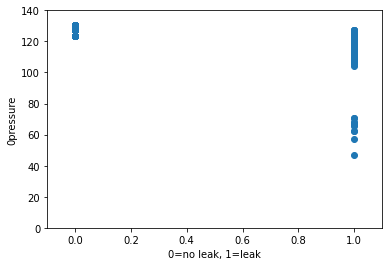

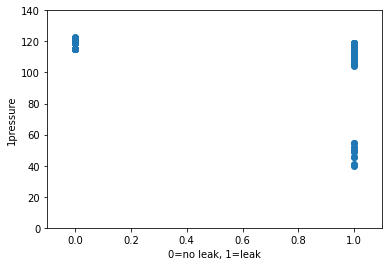

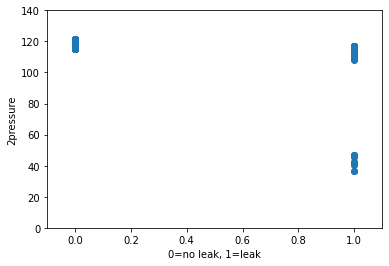

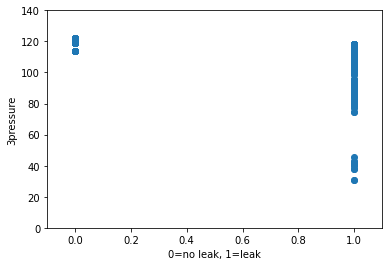

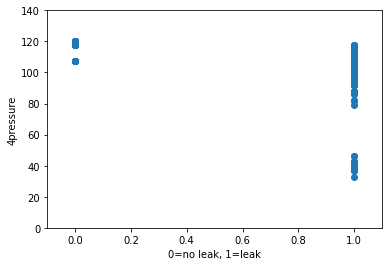

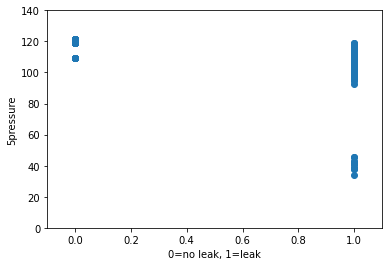

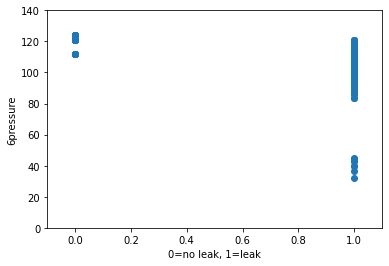

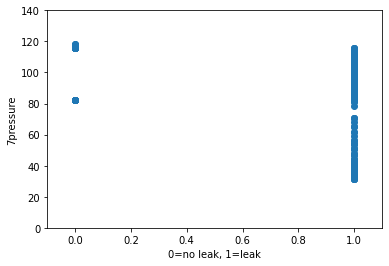

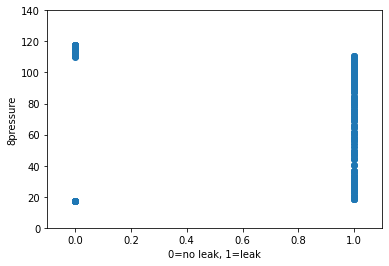

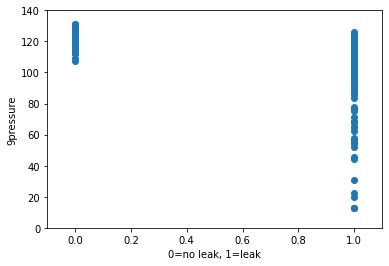

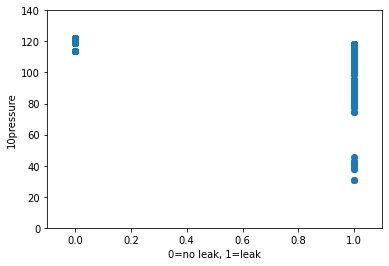

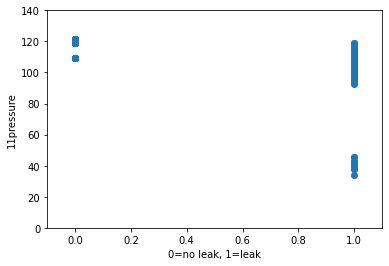

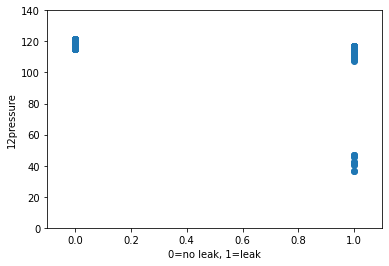

In [ ]:
import matplotlib.pyplot as plt
for col in combinedDF:  
    if col != '13':
        plt.scatter('13', col , data=combinedDF)
        plt.ylabel(col +  'pressure')
        plt.xlabel('0=no leak, 1=leak')
        plt.axis([-0.1, 1.1, 0, 140])
        plt.show()

VISUALISATION OF DATA:

THE PRESSURES WHICH WERE WRONGLY PREDICTED

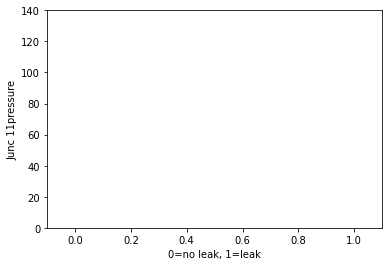

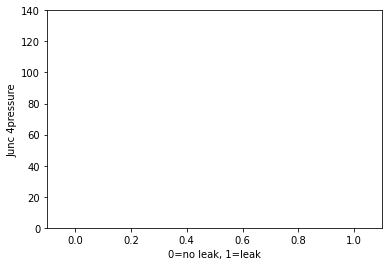

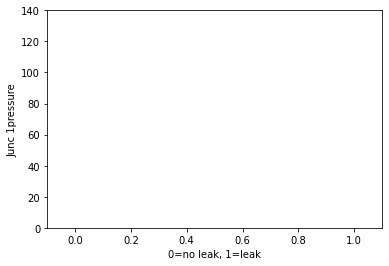

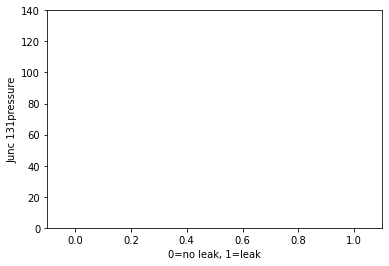

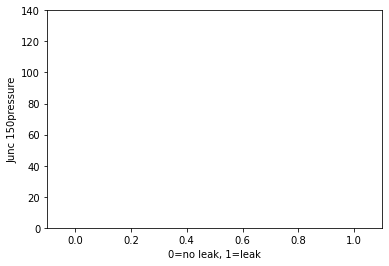

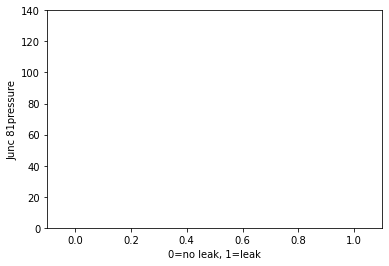

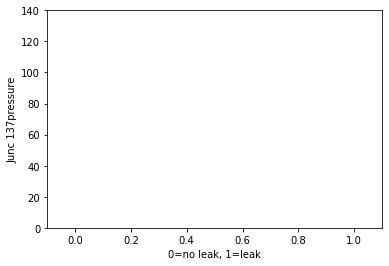

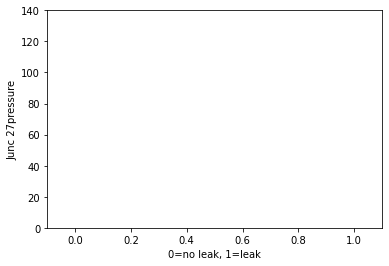

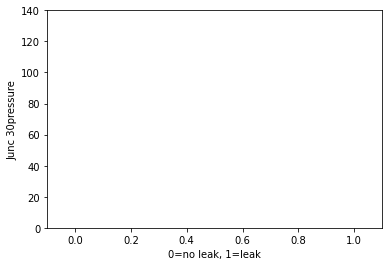

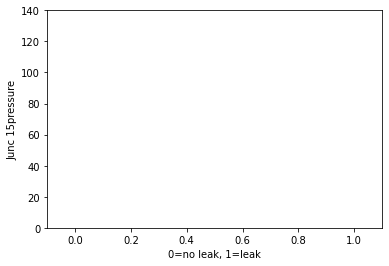

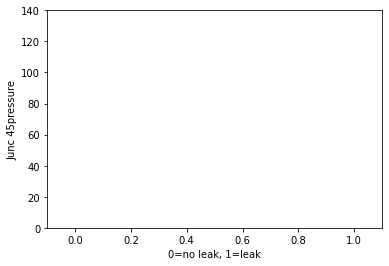

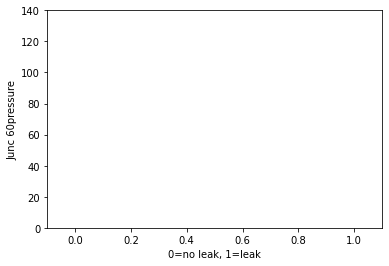

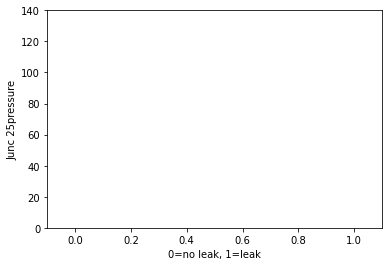

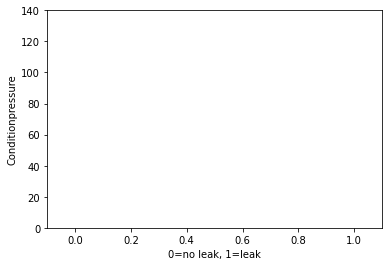

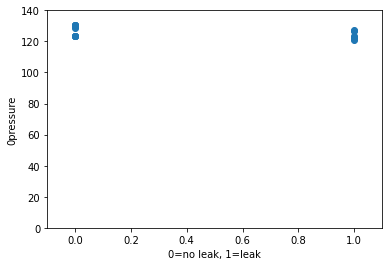

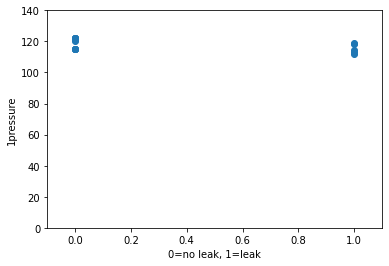

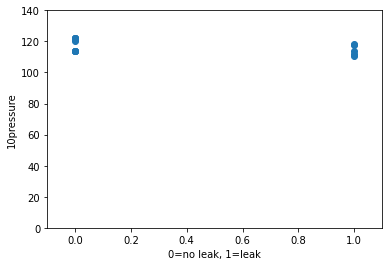

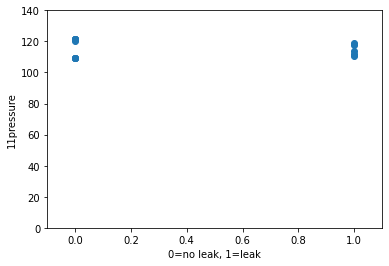

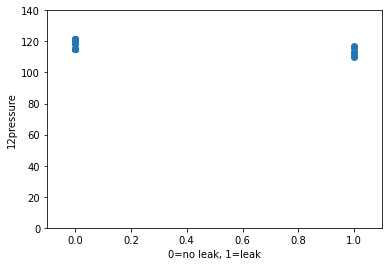

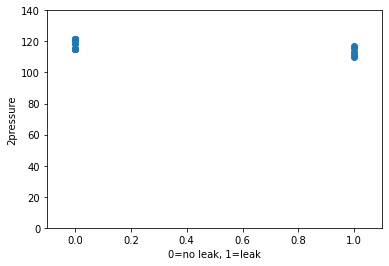

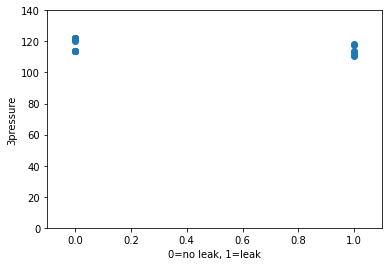

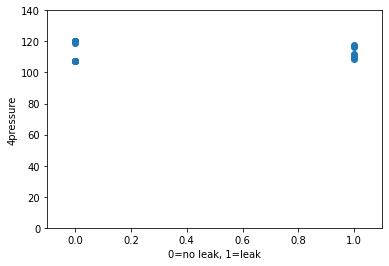

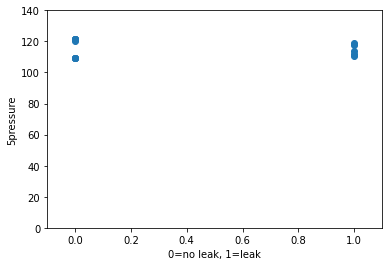

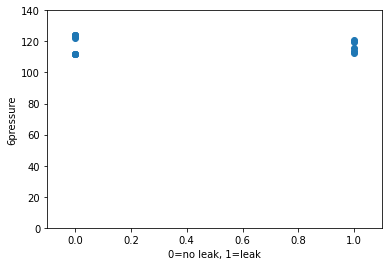

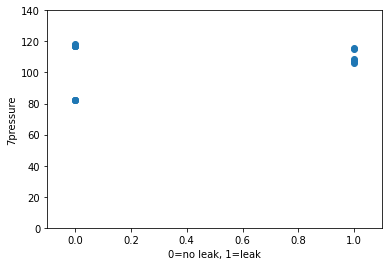

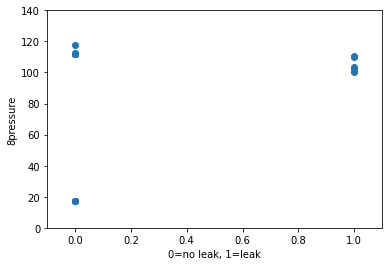

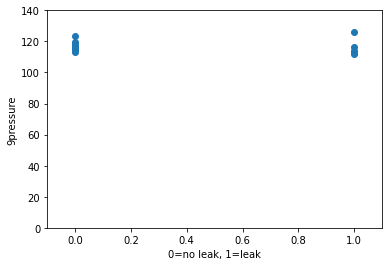

In [ ]:
for col in wrong_prediction_df:  
    if col != '13':
        plt.scatter('13', col , data=wrong_prediction_df)
        plt.ylabel(col +  'pressure')
        plt.xlabel('0=no leak, 1=leak')
        plt.axis([-0.1, 1.1, 0, 140])
        plt.show()